# Getting started

Once you've chosen your scenario, download the data from [the Iowa website](https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy) in csv format. Start by loading the data with pandas. You may need to parse the date columns appropriately.

In [177]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import timedelta
from collections import Counter
from sklearn import linear_model

## Load the data into a DataFrame
sales = pd.read_csv('Iowa_Liquor_sales_sample_10pct.csv')

sales.head()

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.0,2.38
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.5,0.40
2,02/11/2016,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,$12.59,$18.89,24,$453.36,24.0,6.34
3,02/03/2016,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,$9.50,$14.25,6,$85.50,10.5,2.77
4,08/18/2015,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,$7.20,$10.80,12,$129.60,21.0,5.55


In [178]:
## Transform the dates if needed, e.g.
sales["Date"] = pd.to_datetime(sales["Date"], format='%m/%d/%Y')

In [181]:
#sales.columns

In [182]:
#sales.dtypes

In [183]:
# Convert all dollar columns to floats
sales['State Bottle Cost'] = sales['State Bottle Cost'].map(lambda x: x.strip('$')).astype(float)
sales['State Bottle Retail'] = sales['State Bottle Retail'].map(lambda x: x.strip('$')).astype(float)
sales['Sale (Dollars)'] = sales['Sale (Dollars)'].map(lambda x: x.strip('$')).astype(float)

In [184]:
# Extract Month and Year
sales['Month'] = sales['Date'].map(lambda x: x.month)
sales['Year'] = sales['Date'].map(lambda x: x.year)

In [249]:
location = pd.concat([sales['City'], sales['Zip Code'], sales['County Number'], sales['County']], axis=1, keys=['City', 'Zip Code', 'County Number', 'County'])
location = location.dropna()
location = location.drop_duplicates()
location

,City,Zip Code,County Number,County
0,SUMNER,50674,9.0,Bremer
1,DAVENPORT,52807,82.0,Scott
2,CEDAR FALLS,50613,7.0,Black Hawk
3,AMES,50010,85.0,Story
4,BELMOND,50421,99.0,Wright
5,CEDAR RAPIDS,52402,57.0,Linn
6,OTTUMWA,52501,90.0,Wapello
7,CLEAR LAKE,50428,17.0,Cerro Gordo
8,BONDURANT,50035,77.0,Polk
9,SHELLSBURG,52332,6.0,Benton


# Explore the data

Perform some exploratory statistical analysis and make some plots, such as histograms of transaction totals, bottles sold, etc.

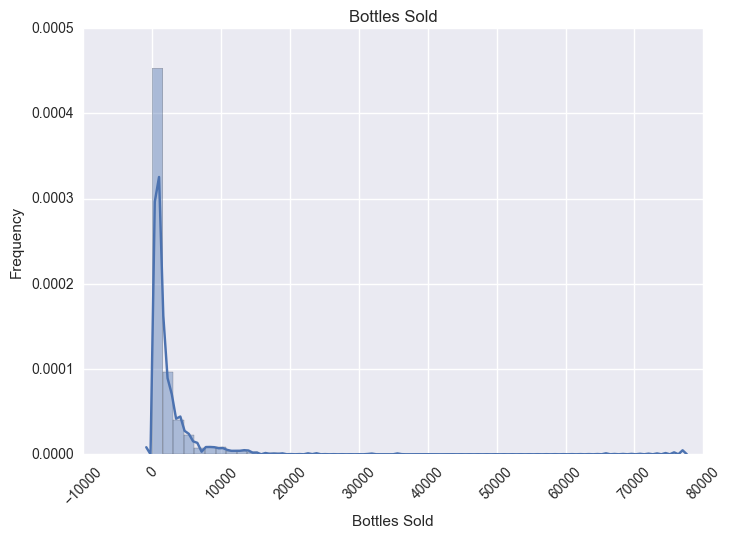

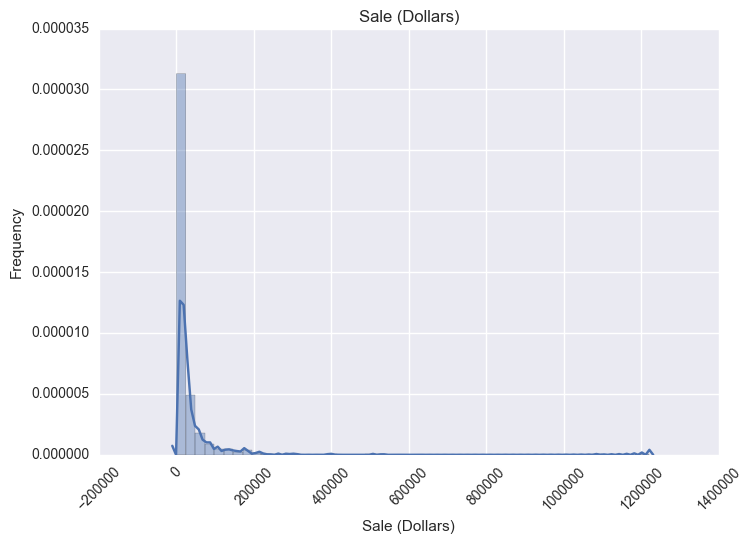

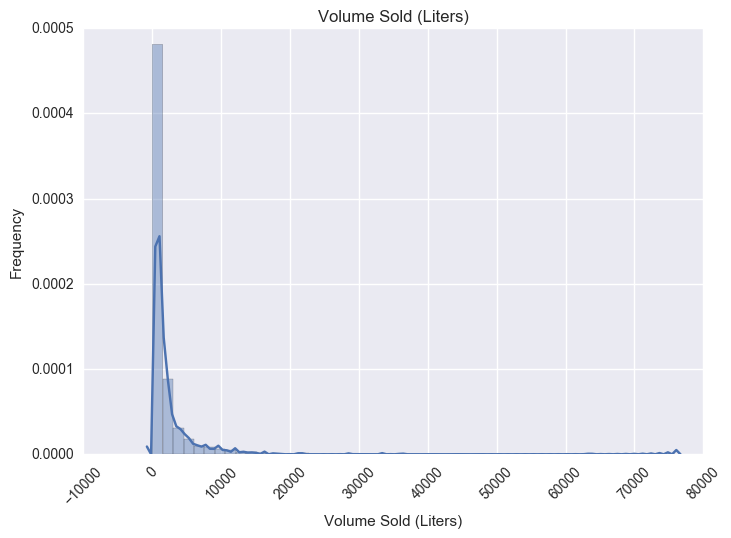

In [185]:
# Let's take a look at the distribution of 'Bottles Sold', 'Sale (Dollars)', and 'Volume Sold (Liters)'
# aggregated by store number
hist_cols = ['Bottles Sold', 'Sale (Dollars)', 'Volume Sold (Liters)']
for i in hist_cols:
    sns.distplot(sales.groupby('Store Number')[i].sum());
    plt.title(i);
    plt.xlabel(i);
    plt.ylabel('Frequency');
    plt.xticks(rotation=45);
    plt.show();
    print 

In [186]:
# Taking a look at our top sales by county
top_sales = sales.copy()
top_sales.groupby('County')[['Sale (Dollars)', 'Volume Sold (Liters)']].\
sum().reset_index().sort_values(by='Sale (Dollars)', ascending=False).head(10)

,County,Sale (Dollars),Volume Sold (Liters)
76,Polk,7.785358e+06,503620.54
56,Linn,3.150429e+06,219587.89
81,Scott,2.468723e+06,162822.42
51,Johnson,2.091306e+06,130491.29
6,Black Hawk,1.936792e+06,132227.97
77,Pottawattamie,1.280695e+06,85908.52
96,Woodbury,1.253160e+06,84454.11
30,Dubuque,1.082556e+06,79246.50
84,Story,1.075273e+06,74549.04
16,Cerro Gordo,6.960987e+05,52786.37


In [187]:
def draw_histograms(data, col):
    sns.distplot(data[col]);
    plt.title(col);
    plt.xlabel(col);
    plt.ylabel('Frequency');
    plt.xticks(rotation=45);
    plt.show();
    print 

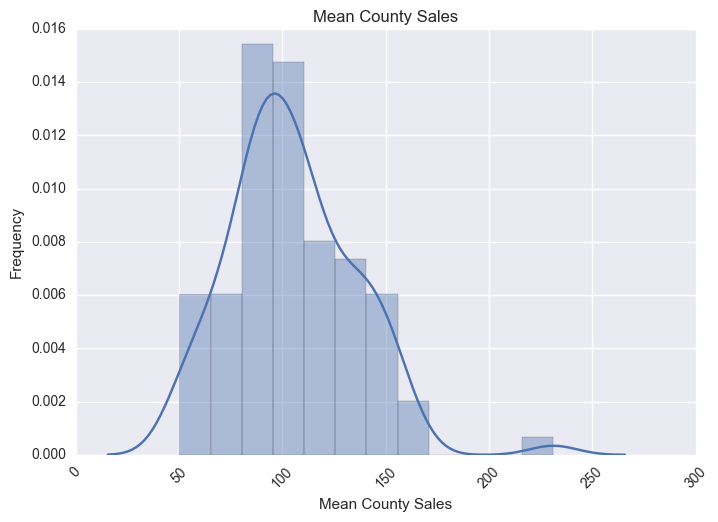

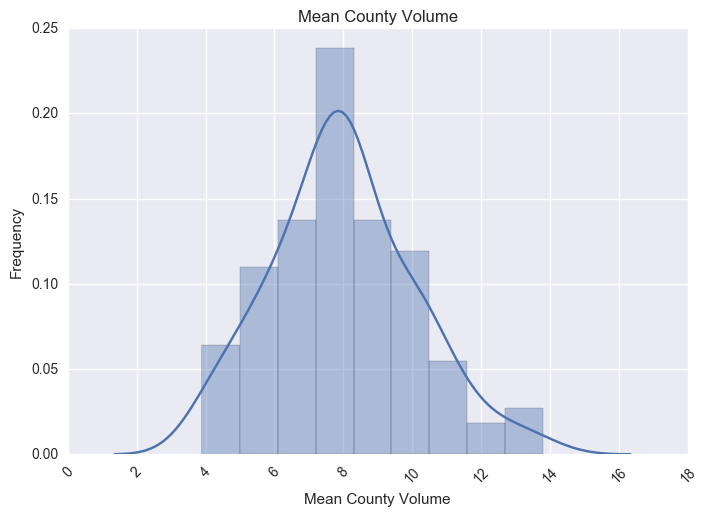

In [188]:
# Mean sales and volume by county
agg_columns = ['Sale (Dollars)', 'Volume Sold (Liters)']
county_mean = sales.groupby('County')[agg_columns].mean().reset_index()
county_mean.columns = ['County', 'Mean County Sales', 'Mean County Volume']
county_mean_aggs = ['Mean County Sales', 'Mean County Volume']

for i in county_mean_aggs:
    draw_histograms(county_mean, i)

In [190]:
demo = pd.read_csv('Iowa_demographics.csv')

# Remove any rows with null values
demo.dropna(inplace=True)

# Remove any whitespace from County names
demo["Area"] = demo["Area"].map(str.strip)

demo.head()

,Area,Total Population,Males (All),Females (All),Under 5 years,5 to 9 years,10 to 14 years,15 to 19 years,20 to 24 years,25 to 34 years,...,Occupied housing units,Vacant housing units,"Vacant: seasnl., recreational, or occasional use",Homeowner vacancy rate (percent),Rental vacancy rate (percent),Occupied housing units.1,Owner-occupied housing units,Renter-occupied housing units,Avg household size of owner-occupied units,Avg household size of renter-occupied units
0,Adair,8243,4036,4207,446,520,604,602,364,770,...,3398,292,22,2.3,7.4,3398,2550,848,2.39,2.29
1,Adams,4482,2203,2279,247,296,329,283,202,425,...,1867,242,22,1.8,6.9,1867,1394,473,2.39,2.19
2,Allamakee,14675,7346,7329,859,994,1163,1043,699,1552,...,5722,1420,1075,1.9,6.7,5722,4374,1348,2.54,2.33
3,Appanoose,13721,6556,7165,763,907,990,945,718,1469,...,5779,918,219,3.3,9.4,5779,4275,1504,2.42,2.11
4,Audubon,6830,3273,3557,396,485,547,459,223,627,...,2773,222,33,1.6,7.4,2773,2196,577,2.37,2.51


In [191]:
#demo.dtypes

## Record your findings

Be sure to write out anything observations from your exploratory analysis.

# Mine the data
Now you are ready to compute the variables you will use for your regression from the data. For example, you may want to
compute total sales per store from Jan to March of 2015, mean price per bottle, etc. Refer to the readme for more ideas appropriate to your scenario.

Pandas is your friend for this task. Take a look at the operations [here](http://pandas.pydata.org/pandas-docs/stable/groupby.html) for ideas on how to make the best use of pandas and feel free to search for blog and Stack Overflow posts to help you group data by certain variables and compute sums, means, etc. You may find it useful to create a new data frame to house this summary data.

In [192]:
# Aggregate sales and volume by stores
store_summary = sales.groupby('Store Number')[agg_columns].sum().reset_index()
store_summary.columns = ['Store Number', 'Store Sales', 'Store Volume']
store_aggs = ['Store Sales', 'Store Volume']

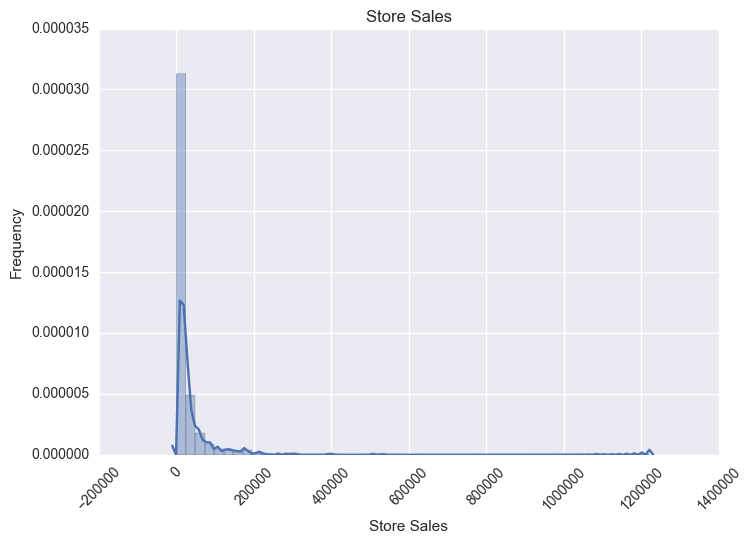

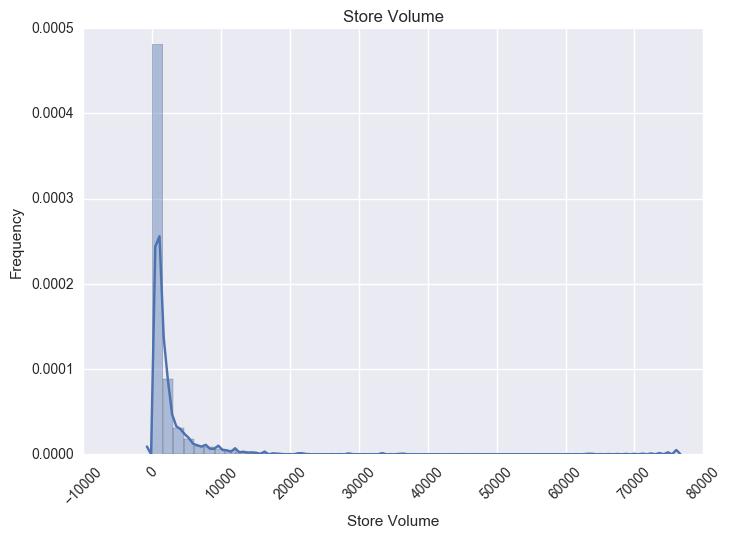

In [193]:
for i in store_aggs:
    draw_histograms(store_summary, i)

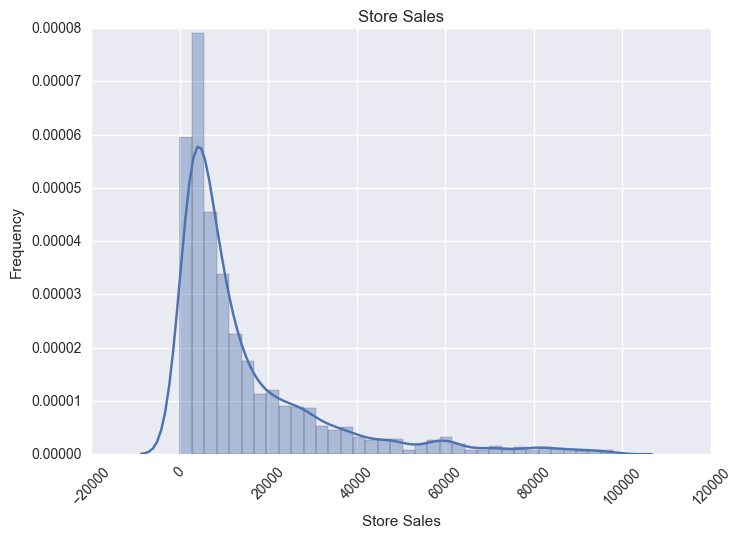

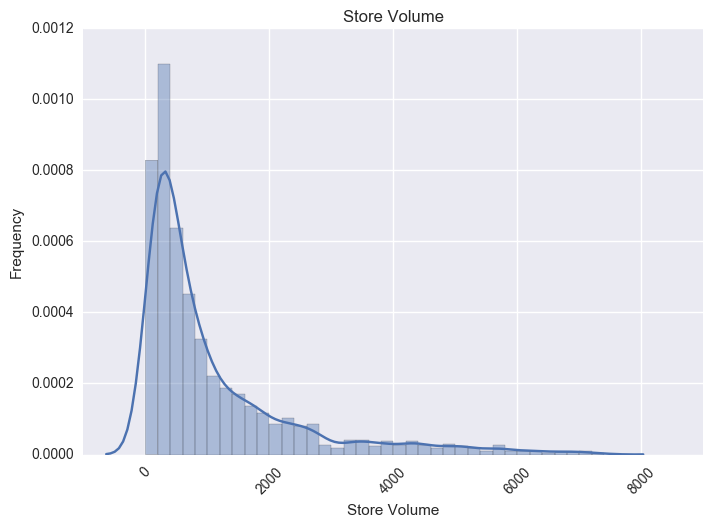

In [194]:
# In terms of total sales, we will remove the outliers
# Set at total sales > 100000
store_summary = store_summary[store_summary['Store Sales'] <= 100000]


for i in store_aggs:
    draw_histograms(store_summary, i)

In [195]:
columns_required = ['Year', 'Month', 'Store Number', 'County']
sales2 = sales.copy()[columns_required].merge(store_summary, how='left', on='Store Number').drop_duplicates()
sales2

,Year,Month,Store Number,County,Store Sales,Store Volume
0,2015,11,3717,Bremer,11533.32,872.53
1,2016,3,2614,Scott,NaN,NaN
2,2016,2,2106,Black Hawk,NaN,NaN
3,2016,2,2501,Story,NaN,NaN
4,2015,8,3654,Wright,11873.68,1029.00
5,2015,4,2569,Linn,61493.59,4334.13
6,2015,8,2596,Wapello,33078.79,2996.17
7,2015,6,3456,Cerro Gordo,80830.03,5680.77
8,2016,1,4757,Polk,11611.98,816.51
9,2015,11,4346,Benton,10709.11,910.37


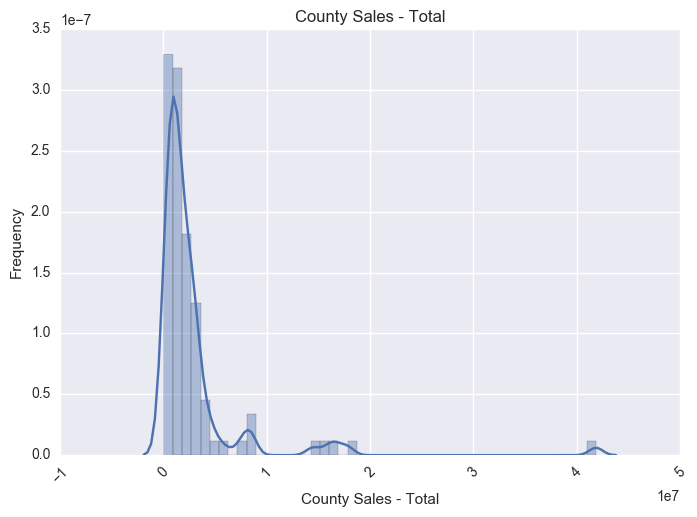

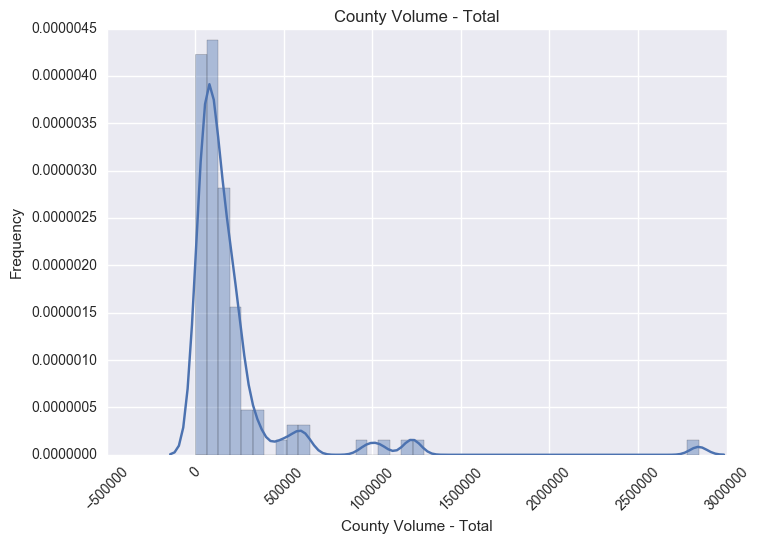

In [196]:
# Aggregate sales and volume by county
county_summary = sales2.groupby('County')[store_aggs].sum().reset_index().dropna()
county_summary.columns = ['County', 'County Sales - Total', 'County Volume - Total']
county_aggs = ['County Sales - Total', 'County Volume - Total']


for i in county_aggs:
    draw_histograms(county_summary, i)

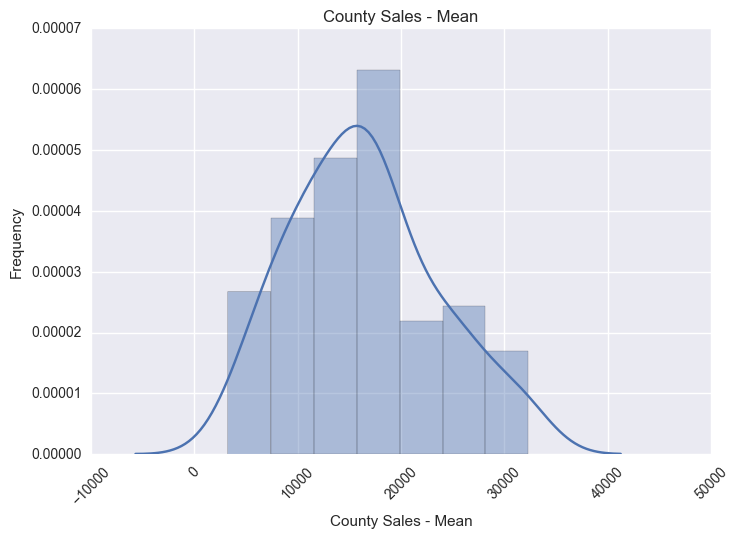

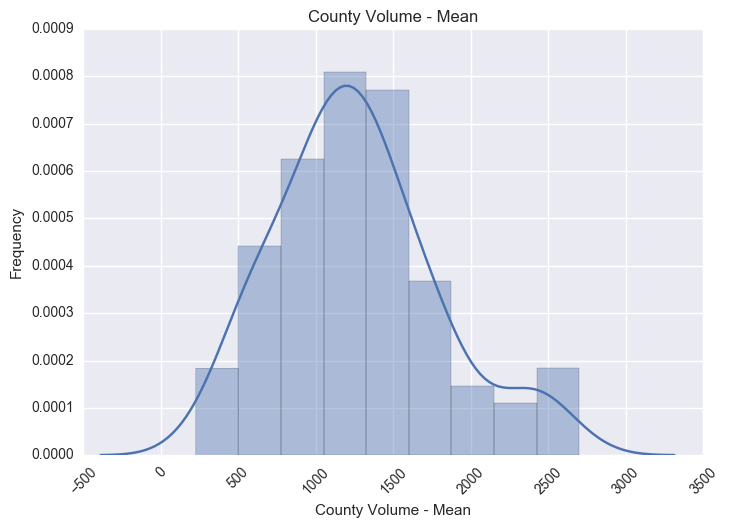

In [197]:
# Mean sales and volume by county
county_mean = sales2.groupby('County')[store_aggs].mean().reset_index().dropna()
county_mean.columns = ['County', 'County Sales - Mean', 'County Volume - Mean']
county_mean_aggs = ['County Sales - Mean', 'County Volume - Mean']

for i in county_mean_aggs:
    draw_histograms(county_mean, i)

In [198]:
sales2 = sales2[columns_required].merge(county_summary, how='left', on='County').drop_duplicates()
sales2 = sales2.merge(county_mean, how='left', on='County').drop_duplicates()
sales2.head()

,Year,Month,Store Number,County,County Sales - Total,County Volume - Total,County Sales - Mean,County Volume - Mean
0,2015,11,3717,Bremer,3029733.19,237397.15,26118.389569,2046.527155
1,2016,3,2614,Scott,14472728.48,970437.74,18844.698542,1263.590807
2,2016,2,2106,Black Hawk,17836996.40,1209517.81,21083.920095,1429.690083
3,2016,2,2501,Story,7388977.25,520717.45,15687.849788,1105.557219
4,2015,8,3654,Wright,1128355.02,97647.75,9897.851053,856.559211


In [199]:
# Add a column for price per liter based on mean sales and mean volumes
sales2['Dollar per liter'] = sales2['County Sales - Total']/sales2['County Volume - Total']
sales2.head()

,Year,Month,Store Number,County,County Sales - Total,County Volume - Total,County Sales - Mean,County Volume - Mean,Dollar per liter
0,2015,11,3717,Bremer,3029733.19,237397.15,26118.389569,2046.527155,12.762298
1,2016,3,2614,Scott,14472728.48,970437.74,18844.698542,1263.590807,14.913608
2,2016,2,2106,Black Hawk,17836996.40,1209517.81,21083.920095,1429.690083,14.747196
3,2016,2,2501,Story,7388977.25,520717.45,15687.849788,1105.557219,14.189994
4,2015,8,3654,Wright,1128355.02,97647.75,9897.851053,856.559211,11.555361


In [200]:
# Add store count
num_stores = sales2[['County','Store Number']].drop_duplicates()
num_stores = num_stores.groupby('County').count().reset_index()
num_stores.columns = ['County', 'Store Count']
sales2 = sales2.merge(num_stores, how='left', on='County')
sales2.head()

,Year,Month,Store Number,County,County Sales - Total,County Volume - Total,County Sales - Mean,County Volume - Mean,Dollar per liter,Store Count
0,2015,11,3717,Bremer,3029733.19,237397.15,26118.389569,2046.527155,12.762298,9.0
1,2016,3,2614,Scott,14472728.48,970437.74,18844.698542,1263.590807,14.913608,66.0
2,2016,2,2106,Black Hawk,17836996.40,1209517.81,21083.920095,1429.690083,14.747196,73.0
3,2016,2,2501,Story,7388977.25,520717.45,15687.849788,1105.557219,14.189994,38.0
4,2015,8,3654,Wright,1128355.02,97647.75,9897.851053,856.559211,11.555361,10.0


In [201]:
# Rearranging our df so that month and year are the last 2 columns
sales2_columns = sales2.columns.values.tolist()
sales2_columns = sales2_columns[2:]
sales2_columns.extend(['Month', 'Year'])
sales2 = sales2[sales2_columns]
sales2.head()

,Store Number,County,County Sales - Total,County Volume - Total,County Sales - Mean,County Volume - Mean,Dollar per liter,Store Count,Month,Year
0,3717,Bremer,3029733.19,237397.15,26118.389569,2046.527155,12.762298,9.0,11,2015
1,2614,Scott,14472728.48,970437.74,18844.698542,1263.590807,14.913608,66.0,3,2016
2,2106,Black Hawk,17836996.40,1209517.81,21083.920095,1429.690083,14.747196,73.0,2,2016
3,2501,Story,7388977.25,520717.45,15687.849788,1105.557219,14.189994,38.0,2,2016
4,3654,Wright,1128355.02,97647.75,9897.851053,856.559211,11.555361,10.0,8,2015


In [203]:
model_df = sales2.merge(demo, how='left', left_on='County', right_on='Area').drop('Area', axis=1)
model_df.head()


,Store Number,County,County Sales - Total,County Volume - Total,County Sales - Mean,County Volume - Mean,Dollar per liter,Store Count,Month,Year,...,Occupied housing units,Vacant housing units,"Vacant: seasnl., recreational, or occasional use",Homeowner vacancy rate (percent),Rental vacancy rate (percent),Occupied housing units.1,Owner-occupied housing units,Renter-occupied housing units,Avg household size of owner-occupied units,Avg household size of renter-occupied units
0,3717,Bremer,3029733.19,237397.15,26118.389569,2046.527155,12.762298,9.0,11,2015,...,8860.0,477.0,87.0,1.5,5.4,8860.0,6927.0,1933.0,2.56,2.12
1,2614,Scott,14472728.48,970437.74,18844.698542,1263.590807,14.913608,66.0,3,2016,...,62334.0,3315.0,284.0,1.5,7.3,62334.0,43979.0,18355.0,2.63,2.17
2,2106,Black Hawk,17836996.40,1209517.81,21083.920095,1429.690083,14.747196,73.0,2,2016,...,49683.0,2076.0,116.0,0.8,5.0,49683.0,34248.0,15435.0,2.54,2.25
3,2501,Story,7388977.25,520717.45,15687.849788,1105.557219,14.189994,38.0,2,2016,...,29383.0,1247.0,97.0,1.5,4.1,29383.0,17125.0,12258.0,2.60,2.11
4,3654,Wright,1128355.02,97647.75,9897.851053,856.559211,11.555361,10.0,8,2015,...,5940.0,619.0,162.0,2.3,6.7,5940.0,4407.0,1533.0,2.42,2.20


# Refine the data
Look for any statistical relationships, correlations, or other relevant properties of the dataset.

In [204]:
model_df.corr()

,Store Number,County Sales - Total,County Volume - Total,County Sales - Mean,County Volume - Mean,Dollar per liter,Store Count,Month,Year,Total Population,...,Occupied housing units,Vacant housing units,"Vacant: seasnl., recreational, or occasional use",Homeowner vacancy rate (percent),Rental vacancy rate (percent),Occupied housing units.1,Owner-occupied housing units,Renter-occupied housing units,Avg household size of owner-occupied units,Avg household size of renter-occupied units
Store Number,1.000000,0.028793,0.028060,-0.064673,-0.073392,0.015169,0.030910,0.015511,0.022332,0.032005,...,0.031397,0.023696,-0.017511,-0.016902,-0.041876,0.031397,0.030943,0.032168,0.067236,0.033069
County Sales - Total,0.028793,1.000000,0.999444,0.096109,-0.062091,0.633874,0.990812,-0.003001,0.000049,0.988587,...,0.988765,0.965998,0.237057,-0.292619,-0.385314,0.988765,0.983444,0.993319,0.307003,-0.389608
County Volume - Total,0.028060,0.999444,1.000000,0.091890,-0.062489,0.622010,0.993367,-0.002935,0.000106,0.990960,...,0.991209,0.969137,0.243081,-0.298137,-0.383976,0.991209,0.986926,0.993468,0.309857,-0.399695
County Sales - Mean,-0.064673,0.096109,0.091890,1.000000,0.963237,0.338745,0.009311,0.001018,-0.000777,0.029424,...,0.029338,0.023353,0.053119,-0.274845,-0.176535,0.029338,0.017687,0.054682,0.023930,-0.246778
County Volume - Mean,-0.073392,-0.062091,-0.062489,0.963237,1.000000,0.082705,-0.136263,0.001493,-0.001100,-0.122030,...,-0.121155,-0.115912,0.039695,-0.218681,-0.069266,-0.121155,-0.127731,-0.105859,-0.047349,-0.219131
Dollar per liter,0.015169,0.633874,0.622010,0.338745,0.082705,1.000000,0.583013,-0.000851,0.000736,0.607179,...,0.603355,0.570068,0.089524,-0.283844,-0.366280,0.603355,0.586247,0.636539,0.317329,-0.151516
Store Count,0.030910,0.990812,0.993367,0.009311,-0.136263,0.583013,1.000000,-0.003085,0.000493,0.995914,...,0.996286,0.977971,0.247186,-0.278298,-0.343173,0.996286,0.995201,0.991493,0.318826,-0.388111
Month,0.015511,-0.003001,-0.002935,0.001018,0.001493,-0.000851,-0.003085,1.000000,-0.508924,-0.002774,...,-0.002815,-0.002473,0.001401,0.001489,0.001466,-0.002815,-0.002913,-0.002579,0.000710,-0.002638
Year,0.022332,0.000049,0.000106,-0.000777,-0.001100,0.000736,0.000493,-0.508924,1.000000,0.000388,...,0.000426,0.000550,-0.000997,-0.002471,-0.000205,0.000426,0.000630,-0.000026,0.001748,0.001567
Total Population,0.032005,0.988587,0.990960,0.029424,-0.122030,0.607179,0.995914,-0.002774,0.000388,1.000000,...,0.999883,0.980294,0.238935,-0.292960,-0.351994,0.999883,0.998709,0.995261,0.354913,-0.395395


# Build your models

Using scikit-learn or statsmodels, build the necessary models for your scenario. Evaluate model fit.

In [210]:
features = model_df.columns.values.tolist()
print features

['Store Number', 'County', 'County Sales - Total', 'County Volume - Total', 'County Sales - Mean', 'County Volume - Mean', 'Dollar per liter', 'Store Count', 'Month', 'Year', ' Total Population ', ' Males (All) ', ' Females (All) ', 'Under 5 years', '5 to 9 years', '10 to 14 years', '15 to 19 years', '20 to 24 years', '25 to 34 years', '35 to 44 years', '45 to 54 years', '55 to 59 years', '60 to 64 years', '65 to 74 years', '75 to 84 years', '85 years and over', 'Median age (years)', '18 years and over', 'Male (18+)', 'Female (18+)', '21 years and over', '62 years and over', '65 years and over', 'Male (65+)', 'Female (65+)', 'Total One Race Alone', 'White', 'Black or African American', 'American Indian and Alaska Native', 'Asian Total', 'Asian Indian', 'Chinese', 'Filipino', 'Japanese', 'Korean', 'Vietnamese', 'Other Asian 1', 'Nat Hawaiian/ Oth Pacif Islander Total', 'Native Hawaiian', 'Guamanian or Chamorro', 'Samoan', 'Other Pacific Islander2', 'Some other race', 'Two or more races'

In [211]:
drop_features = ['Store Number', 'County',\
                 'County Sales - Total', 'County Volume - Total', 'County Sales - Mean', 'County Volume - Mean',\
                 'Dollar per liter', 'Store Count', 'Month']
for i in drop_features:
    features.remove(i)

In [212]:
model_df.dropna(inplace=True)
X = model_df[features]

In [243]:
y_sales = model_df['County Sales - Total']
lasso = linear_model.LassoCV(cv=10)
model_sales = lasso.fit(X,y_sales)
print 'r-squared: {}'.format(model_sales.score(X,y_sales))

feature_imp = pd.DataFrame([features, model_sales.coef_.tolist()], index=['feature', 'coef']).T
feature_imp['coef'] = feature_imp['coef'].astype(float)
feature_imp = feature_imp.sort_values(by='coef', ascending=False)

r-squared: 0.983549385782


In [215]:
feature_imp

,feature,coef
18,18 years and over,88.204456
1,Total Population,85.079051
28,Black or African American,74.211635
8,20 to 24 years,73.738173
0,Year,-0.000000
63,Child,-0.000000
71,Non\ninstitutionalized population,0.000000
70,Institutionalized population,0.000000
69,In group quarters,0.000000
68,Unmarried partner,0.000000


In [242]:
y_volume = model_df['County Volume - Total']
lasso2 = linear_model.LassoCV(cv=5)
model_volume = lasso2.fit(X,y_volume)
print 'r-squared: {}'.format(model_volume.score(X,y_volume))

feature_imp_v = pd.DataFrame([features, model_volume.coef_.tolist()], index=['feature', 'coef']).T
feature_imp_v['coef'] = feature_imp_v['coef'].astype(float)
feature_imp_v = feature_imp_v.sort_values(by='coef', ascending=False)

r-squared: 0.984020721117


In [217]:
feature_imp_v

,feature,coef
18,18 years and over,6.415818
1,Total Population,2.854693
8,20 to 24 years,1.756723
62,Spouse,-0.000000
71,Non\ninstitutionalized population,0.000000
70,Institutionalized population,0.000000
69,In group quarters,0.000000
68,Unmarried partner,0.000000
67,Nonrelatives,0.000000
66,Other relatives under 18,0.000000


## Plot your results

Again make sure that you record any valuable information. For example, in the tax scenario, did you find the sales from the first three months of the year to be a good predictor of the total sales for the year? Plot the predictions versus the true values and discuss the successes and limitations of your models

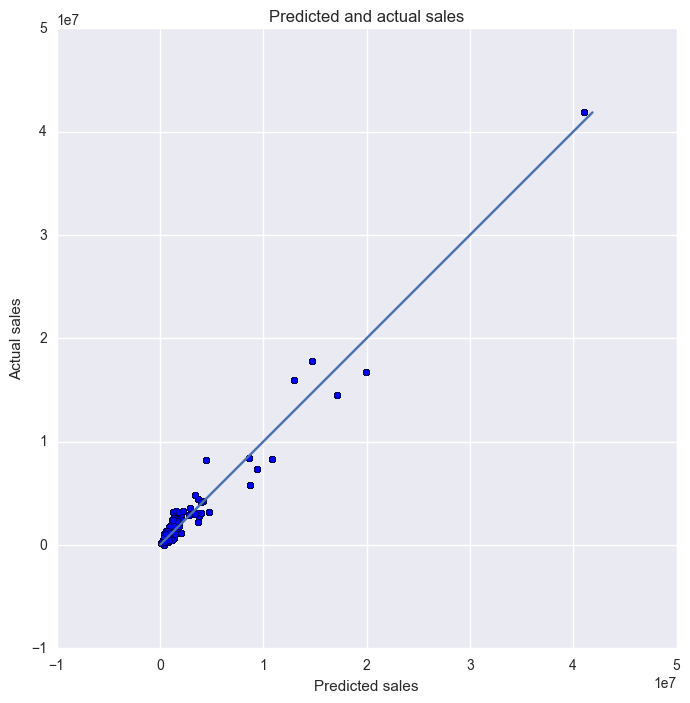

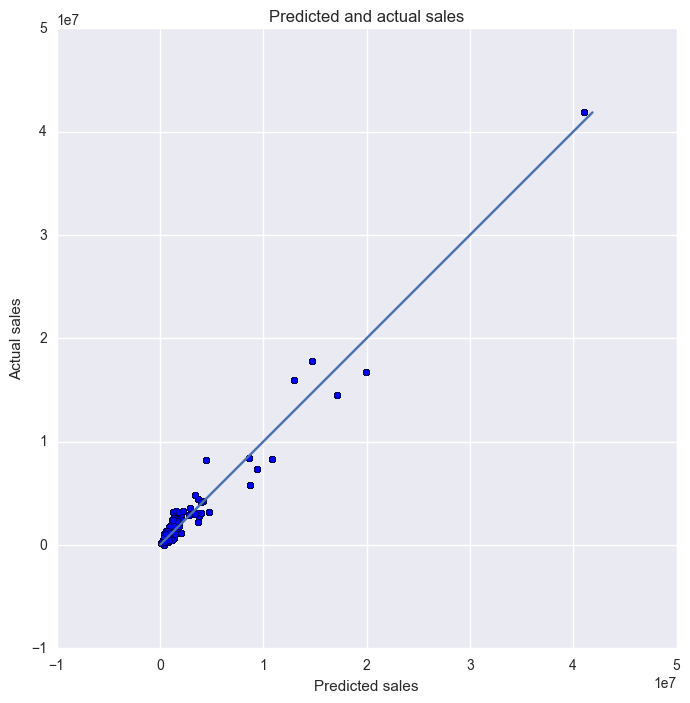

In [257]:
predicted_sales = model_sales.predict(X)
fig, ax = plt.subplots(figsize=(8,8));
plt.scatter(predicted_sales, y_sales);
plt.plot([min(y_sales), max(y_sales)], [min(y_sales), max(y_sales)], '-');
plt.title('Predicted and actual sales');
plt.xlabel('Predicted sales');
plt.ylabel('Actual sales');
plt.show()

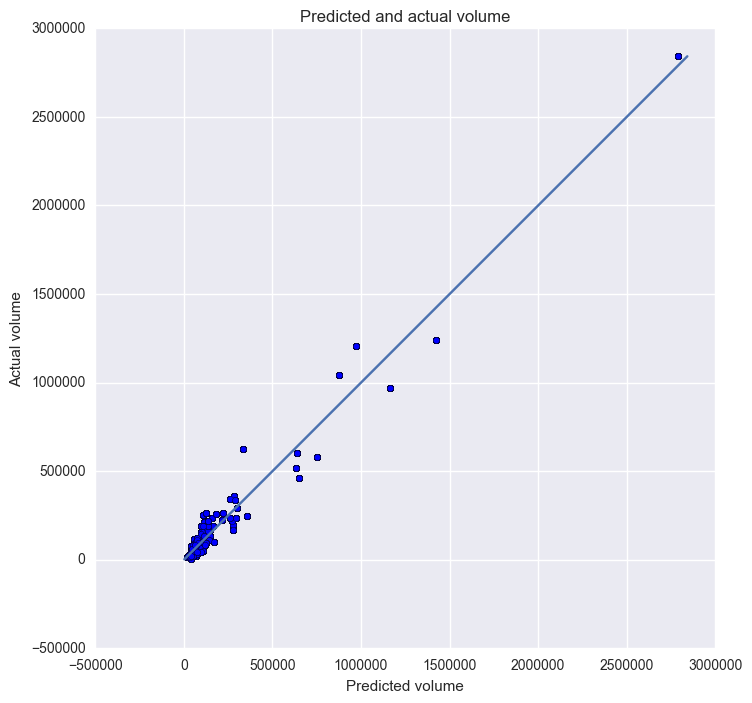

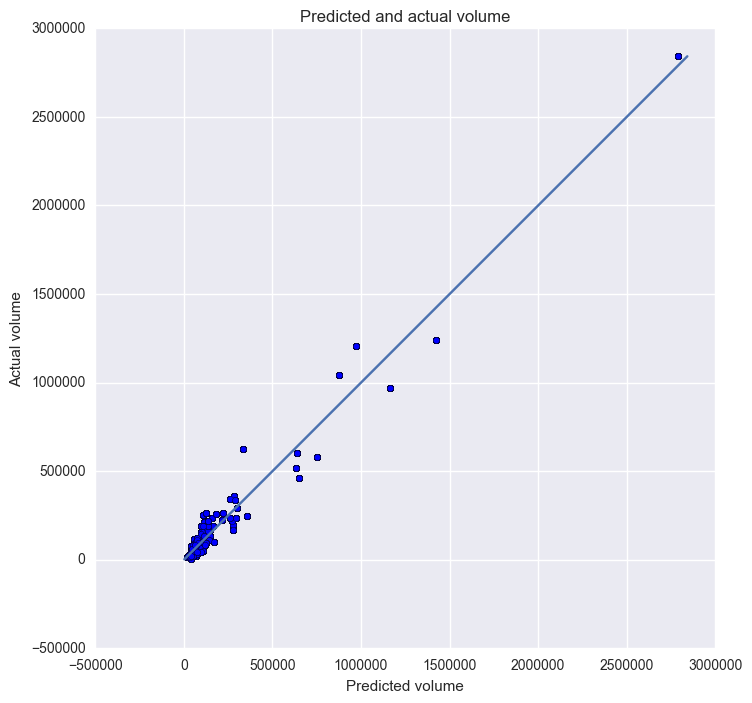

In [259]:
predicted_volume = model_volume.predict(X)
fig, ax = plt.subplots(figsize=(8,8));
plt.scatter(predicted_volume, y_volume);
plt.plot([min(y_volume), max(y_volume)], [min(y_volume), max(y_volume)], '-');
plt.title('Predicted and actual volume');
plt.xlabel('Predicted volume');
plt.ylabel('Actual volume');
plt.show()

# Present the Results

Present your conclusions and results. If you have more than one interesting model feel free to include more than one along with a discussion. Use your work in this notebook to prepare your write-up.

In [250]:
# Predict sales for all zip codes
predict_df = location.copy()
predict_df['Year'] = 2016
predict_df = predict_df.merge(demo, left_on='County', right_on='Area').drop('Area', axis=1)

In [251]:
X_predict = predict_df[features]
all_sales = model_sales.predict(X_predict)
all_volume = model_volume.predict(X_predict)

In [252]:
predict_df['Predicted Total Sales'] = all_sales
predict_df['Predicted Total Volume'] = all_volume
predict_df['Predicted Dollar/liter'] = predict_df['Predicted Total Sales']/predict_df['Predicted Total Volume']

predict_df.head()

,City,Zip Code,County Number,County,Year,Total Population,Males (All),Females (All),Under 5 years,5 to 9 years,...,Homeowner vacancy rate (percent),Rental vacancy rate (percent),Occupied housing units.1,Owner-occupied housing units,Renter-occupied housing units,Avg household size of owner-occupied units,Avg household size of renter-occupied units,Predicted Total Sales,Predicted Total Volume,Predicted Dollar/liter
0,SUMNER,50674,9.0,Bremer,2016,23325,11274,12051,1291,1532,...,1.5,5.4,8860,6927,1933,2.56,2.12,2.023453e+06,1.600816e+05,12.640141
1,TRIPOLI,50676,9.0,Bremer,2016,23325,11274,12051,1291,1532,...,1.5,5.4,8860,6927,1933,2.56,2.12,2.023453e+06,1.600816e+05,12.640141
2,WAVERLY,50677,9.0,Bremer,2016,23325,11274,12051,1291,1532,...,1.5,5.4,8860,6927,1933,2.56,2.12,2.023453e+06,1.600816e+05,12.640141
3,DENVER,50622,9.0,Bremer,2016,23325,11274,12051,1291,1532,...,1.5,5.4,8860,6927,1933,2.56,2.12,2.023453e+06,1.600816e+05,12.640141
4,DAVENPORT,52807,82.0,Scott,2016,158668,77627,81041,10989,11538,...,1.5,7.3,62334,43979,18355,2.63,2.17,1.713330e+07,1.163745e+06,14.722556


In [255]:
top_counties = predict_df.sort_values(by='Predicted Total Sales', ascending=False).head(100)
top_counties

,City,Zip Code,County Number,County,Year,Total Population,Males (All),Females (All),Under 5 years,5 to 9 years,...,Homeowner vacancy rate (percent),Rental vacancy rate (percent),Occupied housing units.1,Owner-occupied housing units,Renter-occupied housing units,Avg household size of owner-occupied units,Avg household size of renter-occupied units,Predicted Total Sales,Predicted Total Volume,Predicted Dollar/liter
104,WINDSOR HEIGHTS,50324,77.0,Polk,2016,374601,181739,192862,27955,27210,...,1.5,6.1,149112,102621,46491,2.62,2.07,4.099726e+07,2.790847e+06,14.689900
91,URBANDALE,50322,77.0,Polk,2016,374601,181739,192862,27955,27210,...,1.5,6.1,149112,102621,46491,2.62,2.07,4.099726e+07,2.790847e+06,14.689900
89,DES MOINES,50316,77.0,Polk,2016,374601,181739,192862,27955,27210,...,1.5,6.1,149112,102621,46491,2.62,2.07,4.099726e+07,2.790847e+06,14.689900
88,CLIVE,50325,77.0,Polk,2016,374601,181739,192862,27955,27210,...,1.5,6.1,149112,102621,46491,2.62,2.07,4.099726e+07,2.790847e+06,14.689900
87,PLEASANT HILL,50317,77.0,Polk,2016,374601,181739,192862,27955,27210,...,1.5,6.1,149112,102621,46491,2.62,2.07,4.099726e+07,2.790847e+06,14.689900
86,DES MOINES,50315,77.0,Polk,2016,374601,181739,192862,27955,27210,...,1.5,6.1,149112,102621,46491,2.62,2.07,4.099726e+07,2.790847e+06,14.689900
84,ANKENY,50023,77.0,Polk,2016,374601,181739,192862,27955,27210,...,1.5,6.1,149112,102621,46491,2.62,2.07,4.099726e+07,2.790847e+06,14.689900
83,DES MOINES,50314,77.0,Polk,2016,374601,181739,192862,27955,27210,...,1.5,6.1,149112,102621,46491,2.62,2.07,4.099726e+07,2.790847e+06,14.689900
82,DES MOINES,50310,77.0,Polk,2016,374601,181739,192862,27955,27210,...,1.5,6.1,149112,102621,46491,2.62,2.07,4.099726e+07,2.790847e+06,14.689900
81,ALTOONA,50009,77.0,Polk,2016,374601,181739,192862,27955,27210,...,1.5,6.1,149112,102621,46491,2.62,2.07,4.099726e+07,2.790847e+06,14.689900
